<a href="https://colab.research.google.com/github/Bahrombekk/OpenCV/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Copy_of_shape_detection_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [88]:
!wget https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/00_primitive_shapes_different_colors.png
!wget https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/01_primitive_shapes_red.png
!wget https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/02_primitive_shapes_angle.png
!wget https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/03_shapes.png

--2023-05-20 11:43:53--  https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/00_primitive_shapes_different_colors.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4972 (4.9K) [image/png]
Saving to: ‘00_primitive_shapes_different_colors.png’

00_primitive_shapes 100%[===================>]   4.86K  --.-KB/s    in 0s      

2023-05-20 11:43:53 (85.9 MB/s) - ‘00_primitive_shapes_different_colors.png’ saved [4972/4972]

--2023-05-20 11:43:54--  https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/01_primitive_shapes_red.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.github

In [152]:
!wget https://dictionary.cambridge.org/images/thumb/ellips_noun_002_12298.jpg?version=5.0.318

--2023-05-20 12:01:59--  https://dictionary.cambridge.org/images/thumb/ellips_noun_002_12298.jpg?version=5.0.318
Resolving dictionary.cambridge.org (dictionary.cambridge.org)... 54.174.181.241
Connecting to dictionary.cambridge.org (dictionary.cambridge.org)|54.174.181.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46210 (45K) [image/jpeg]
Saving to: ‘ellips_noun_002_12298.jpg?version=5.0.318’

ellips_noun_002_122 100%[===================>]  45.13K  --.-KB/s    in 0.001s  

2023-05-20 12:01:59 (33.3 MB/s) - ‘ellips_noun_002_12298.jpg?version=5.0.318’ saved [46210/46210]



In [200]:
def get_filename(name):
  img=cv2.imread(name)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  binary = cv2.inRange(gray, 0, 200)
  return img,gray,binary
img,gray,binary=get_filename("/content/02_primitive_shapes_angle.png")

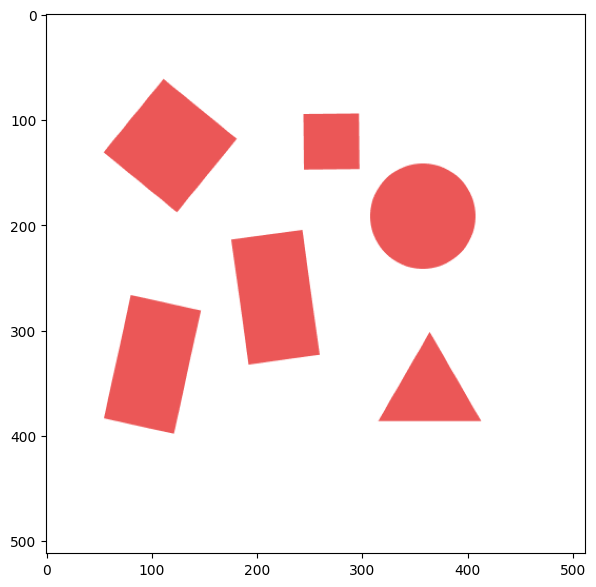

In [201]:
def show(img):
  s=7
  plt.figure(figsize=(s,s),dpi=100)
  plt.imshow(img,cmap='gray')
  # plt.axis("off")
  plt.show()
show(img)

In [202]:
def findContours(img):
  contours,heirarchy = cv2.findContours(img, cv2.RETR_EXTERNAL,	cv2.CHAIN_APPROX_SIMPLE)
  return heirarchy,contours
heirarchy,contours=findContours(binary)


In [203]:
def contourlar_sonini_topish(contours):
  l=[]
  for cnt in contours:
    l.append(int(cv2.contourArea(cnt)))
  l1=[]
  for i in l:
    l1.append(l.index(i))
  return l1
contourlar_sonini_topish(contours)


[0, 1, 2, 3, 4, 5]

[4048, 8013, 8010, 7735, 2677, 7991]


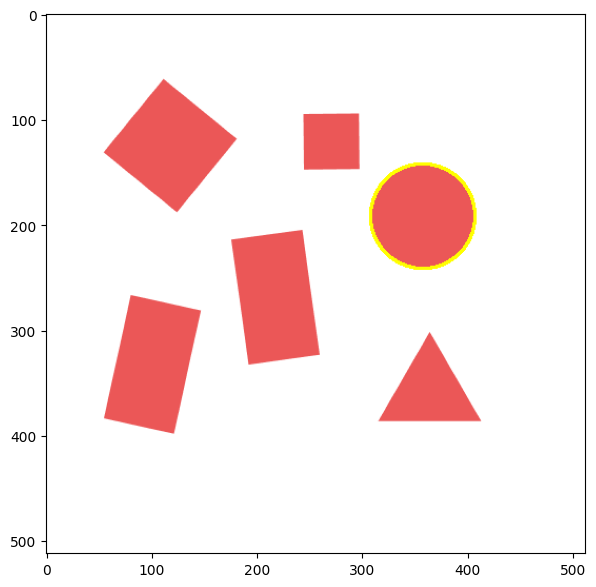

In [204]:
l=[]
for cnt in contours:
  l.append(int(cv2.contourArea(cnt)))
print(l)
img_area = cv2.drawContours(img,contours,3,(255,255,0),2)
show(img_area)

In [205]:
for can in contours:
  len=cv2.arcLength(can,True)
  nuqta=cv2.approxPolyDP(can,0.01*len,True)
  img_i=cv2.drawContours(img,[nuqta],0,(0,0,0),1)
  x1,y1,w,h=cv2.boundingRect(can)
  x,y=nuqta[0][0]
  if nuqta.shape[0]==3:
    cv2.putText(img_i,"Triangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
  elif nuqta.shape[0]==4:
    if w==h:
      if pow(pow(w-x1,2)+pow(h-y1,2),1/2)==pow(pow(h-x,2)+pow(w-y,2),1/2):
        cv2.putText(img_i,"Romb",(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
      else:
        cv2.putText(img_i,"square",(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
  if nuqta.shape[0]==4:
    if h!=w:
      cv2.putText(img_i,"Rectangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
  elif nuqta.shape[0] == 5:
    cv2.putText(img_i,"Pentagon",(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
  elif 6 < nuqta.shape[0] < 17:
    cv2.putText(img_i, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)
  elif  17<nuqta.shape[0] < 20:
    cv2.putText(img_i, "Ellipse", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)

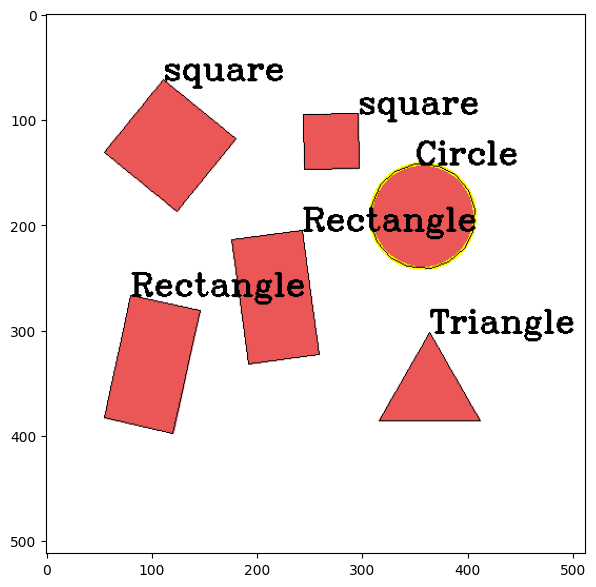

In [206]:
show(img_i)

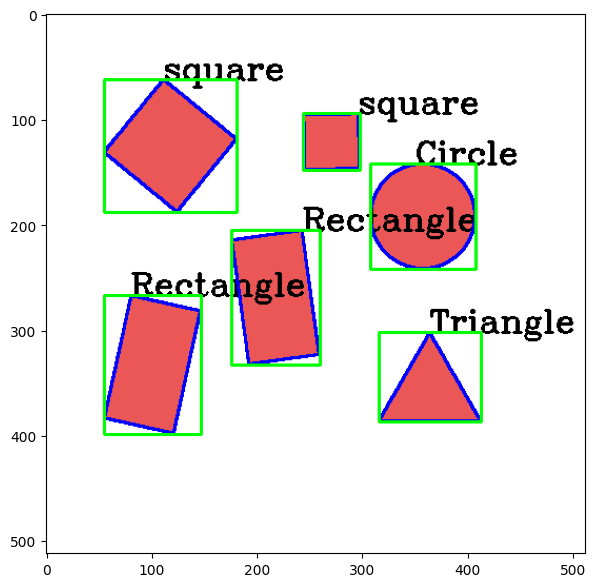

In [207]:
l=[]
for cnt in contours:
  l.append(int(cv2.contourArea(cnt)))
l1=[]
for i in l:
  l1.append(l.index(i))
for i in l1:
  cnt = contours[i]
  x, y, w, h = cv2.boundingRect(cnt)
  img = cv2.drawContours(img, [cnt], 0, (0,0,255), 2)
  img = cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)
show(img)